In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [152]:
Aut_data = pd.read_csv("Toddler Autism dataset July 2018.csv")
Aut_data


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [149]:
Aut_data.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [150]:
Aut_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [153]:
Aut_data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [154]:
Aut_data.corr()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
Case_No,1.000000,0.050828,-0.002668,0.082087,0.073426,0.055263,0.041315,0.087687,0.023916,0.069870,-0.027257,0.027098,0.077110
A1,0.050828,1.000000,0.463227,0.244362,0.247524,0.284808,0.373083,0.332705,0.208197,0.322226,0.130966,0.040508,0.614064
A2,-0.002668,0.463227,1.000000,0.206927,0.265867,0.259105,0.309461,0.294314,0.251865,0.268784,0.157498,0.037744,0.592424
A3,0.082087,0.244362,0.206927,1.000000,0.547100,0.349086,0.297719,0.211375,0.243758,0.379129,0.003848,-0.109880,0.592885
A4,0.073426,0.247524,0.265867,0.547100,1.000000,0.348459,0.347693,0.318546,0.251504,0.427683,0.016872,-0.087873,0.642890
A5,0.055263,0.284808,0.259105,0.349086,0.348459,1.000000,0.415309,0.348913,0.316661,0.441892,0.045347,0.018448,0.649518
A6,0.041315,0.373083,0.309461,0.297719,0.347693,0.415309,1.000000,0.361758,0.280556,0.416213,0.072162,0.065907,0.659377
A7,0.087687,0.332705,0.294314,0.211375,0.318546,0.348913,0.361758,1.000000,0.257228,0.360686,0.175114,0.021442,0.619053
A8,0.023916,0.208197,0.251865,0.243758,0.251504,0.316661,0.280556,0.257228,1.000000,0.293457,0.082004,0.080505,0.543229
A9,0.069870,0.322226,0.268784,0.379129,0.427683,0.441892,0.416213,0.360686,0.293457,1.000000,0.028710,-0.048650,0.671638


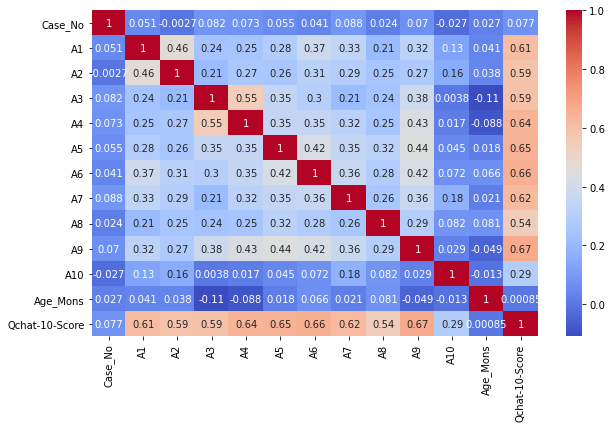

In [155]:
d=Aut_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(d, cmap="coolwarm", annot=True)
plt.show() 

In [156]:
Aut_Cat=Aut_data[["Sex","Ethnicity","Jaundice","Family_mem_with_ASD","Who completed the test"]]


In [157]:
Aut_Cat

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,f,middle eastern,yes,no,family member
1,m,White European,yes,no,family member
2,m,middle eastern,yes,no,family member
3,m,Hispanic,no,no,family member
4,f,White European,no,yes,family member
...,...,...,...,...,...
1049,f,White European,no,yes,family member
1050,m,black,yes,no,family member
1051,m,middle eastern,yes,no,family member
1052,m,White European,no,yes,family member


# Label Encoding


In [158]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
Aut_Cat= Aut_Cat.apply(le.fit_transform)
Aut_Cat

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,8,1,0,4
1,1,5,1,0,4
2,1,8,1,0,4
3,1,0,0,0,4
4,0,5,0,1,4
...,...,...,...,...,...
1049,0,5,0,1,4
1050,1,7,1,0,4
1051,1,8,1,0,4
1052,1,5,0,1,4


In [159]:
Aut_data['Class/ASD Traits '] = Aut_data['Class/ASD Traits '].map({'Yes':1,'No':0})
Aut_data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,0
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,1
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,1
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,0


In [160]:
Aut_data=Aut_data.drop(columns=["Sex","Ethnicity","Jaundice","Family_mem_with_ASD",
                                "Who completed the test","Qchat-10-Score","Case_No"])

In [161]:
Aut_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0
1,1,1,0,0,0,1,1,0,0,0,36,1
2,1,0,0,0,0,0,1,1,0,1,36,1
3,1,1,1,1,1,1,1,1,1,1,24,1
4,1,1,0,1,1,1,1,1,1,1,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0
1050,0,0,1,1,1,0,1,0,1,0,12,1
1051,1,0,1,1,1,1,1,1,1,1,18,1
1052,1,0,0,0,0,0,0,1,0,1,19,0


In [162]:
Aut_new=pd.concat([Aut_data,Aut_Cat],axis=1)

In [163]:
Aut_new

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,0,0,0,0,0,1,1,0,1,28,0,0,8,1,0,4
1,1,1,0,0,0,1,1,0,0,0,36,1,1,5,1,0,4
2,1,0,0,0,0,0,1,1,0,1,36,1,1,8,1,0,4
3,1,1,1,1,1,1,1,1,1,1,24,1,1,0,0,0,4
4,1,1,0,1,1,1,1,1,1,1,20,1,0,5,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0,0,5,0,1,4
1050,0,0,1,1,1,0,1,0,1,0,12,1,1,7,1,0,4
1051,1,0,1,1,1,1,1,1,1,1,18,1,1,8,1,0,4
1052,1,0,0,0,0,0,0,1,0,1,19,0,1,5,0,1,4


In [164]:
x = Aut_new.drop(columns=["Class/ASD Traits "])
y = Aut_new['Class/ASD Traits ']


# Standarization

In [165]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(x)

In [166]:
x = pd.DataFrame(scaled_df, columns=x.columns)

In [167]:
x

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.8,1.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.000000,1.0,0.5,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.000000,1.0,0.8,1.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.500000,1.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,0.0,0.5,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.5,0.0,1.0,1.0
1050,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,1.0,0.7,1.0,0.0,1.0
1051,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.250000,1.0,0.8,1.0,0.0,1.0
1052,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.291667,1.0,0.5,0.0,1.0,1.0


# Splitting Data into Train and Test

In [187]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (790, 16)
Shape of x_test:  (264, 16)
Shape of y_train:  (790,)
Shape of y_test:  (264,)


# Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)


LogisticRegression()

In [189]:
print("Train accuracy:", log.score(x_train,y_train))

print("Test accuracy:", log.score(x_test,y_test))


Train accuracy: 1.0
Test accuracy: 1.0


In [171]:
l_pred_train = log.predict(x_train)
l_pred_train

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [172]:
metrics.confusion_matrix(y_train, l_pred_train)

array([[167,   0],
       [  0, 360]], dtype=int64)

In [173]:
print(metrics.classification_report(y_train, l_pred_train)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       360

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527



In [174]:
print(metrics.classification_report(y_train, l_pred_train)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       360

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527



# Random Forest


In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
clf = RandomForestClassifier(max_depth=8 ,random_state=88)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, random_state=88)

In [177]:
print("Train accuracy:", clf.score(x_train,y_train))

print("Test accuracy:", clf.score(x_test,y_test))


Train accuracy: 1.0
Test accuracy: 0.9582542694497154


In [178]:
features = clf.feature_importances_

In [179]:
features= pd.DataFrame(features)
features

,0
0,0.106222
1,0.082787
2,0.033511
3,0.077114
4,0.161577
5,0.133790
6,0.114428
7,0.057295
8,0.092941
9,0.022749


# AdaBoost Classifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [85]:
print("Train accuracy:", abc.score(x_train,y_train))

print("Test accuracy:", abc.score(x_test,y_test))


Train accuracy: 1.0
Test accuracy: 1.0


In [86]:
a_pred_train = abc.predict(x_train)
a_pred_train

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [87]:
metrics.confusion_matrix(y_train, a_pred_train)

array([[167,   0],
       [  0, 360]], dtype=int64)

In [88]:
print(metrics.classification_report(y_train, a_pred_train)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       360

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527



# KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=11,  p=4)
knn1.fit(x_train, y_train)
print("Train Score :", knn1.score(x_train, y_train))
print("Test Score :", knn1.score(x_test, y_test)) 

Train Score : 0.9620493358633776
Test Score : 0.9544592030360531


In [90]:
k_pred_train = knn1.predict(x_train)
k_pred_train

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,

In [91]:
metrics.confusion_matrix(y_train, k_pred_train)

array([[163,   4],
       [ 16, 344]], dtype=int64)

In [92]:
print(metrics.classification_report(y_train, k_pred_train)) 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       167
           1       0.99      0.96      0.97       360

    accuracy                           0.96       527
   macro avg       0.95      0.97      0.96       527
weighted avg       0.96      0.96      0.96       527



# SVM

In [180]:
from sklearn import svm 
sv2=svm.SVC(kernel='rbf')
sv2.fit(x_train, y_train)
print("Train score :", sv2.score(x_train, y_train))
print("Test score :", sv2.score(x_test, y_test))

Train score : 0.9981024667931688
Test score : 0.9791271347248577


In [181]:
s_pred_train = sv2.predict(x_train)
s_pred_train

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [182]:
metrics.confusion_matrix(y_train, s_pred_train)

array([[166,   1],
       [  0, 360]], dtype=int64)

In [183]:
print(metrics.classification_report(y_train, s_pred_train)) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       167
           1       1.00      1.00      1.00       360

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527



# Naive Bayes


In [184]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)


GaussianNB()

In [185]:
print("Train Accuracy ",gn.score(x_train,y_train))
print("Test Accuracy ",gn.score(x_test,y_test))

Train Accuracy  0.9563567362428842
Test Accuracy  0.9620493358633776


In [186]:
n_pred_train = gn.predict(x_train)
n_pred_train

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [100]:
metrics.confusion_matrix(y_train, n_pred_train)

array([[161,   6],
       [  6, 354]], dtype=int64)

In [101]:
print(metrics.classification_report(y_train, n_pred_train)) 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       167
           1       0.98      0.98      0.98       360

    accuracy                           0.98       527
   macro avg       0.97      0.97      0.97       527
weighted avg       0.98      0.98      0.98       527

